<img style="float: right; margin: 0px 0px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQt6eQo8JPYzYO4p6WmxLtccdtJ4X8WR6GzVVKbsMjyGvUDEn1mg" width="300px" height="100px" />

# Trabajando con opciones

Una opción puede negociarse en el mercado secundario por lo que es importante determinar su valor $V_t$ para cada tiempo $t\in [0, T]$. La ganancia que obtiene quién adquiere la opción se llama función de pago o "payoff" y claramente depende del valor del subyacente. 

Hay una gran variedad de opciones en el mercado y éstas se clasiflcan según su función de pago y la forma en que pueden ejercerse.  Las opciones que tienen como función de pago a
$$ P(S(t),t)=max\{S(T)-K,0\} \rightarrow \text{En el caso de Call}$$ 
$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 
se llaman opciones **Vainilla**, con $h:[0,\infty) \to [0,\infty)$.

La opción se llama **europea** si puede ejercerse sólo en la fecha de vencimiento.

Se dice que una opción es **americana** si puede ejercerse en cualquier momento antes o en la fecha de vencimiento.

Una opción compleja popular son las llamadas **opciones asiáticas** cuyos pagos dependen de todas las trayectorias del precio de los activos subyacentes. Las opciones cuyos pagos dependen de las trayectorias de los precios de los activos subyacentes se denominan opciones dependientes de la ruta.

Principalmente, se puede resumir que las dos razones con más peso de importancia para utilizar opciones son el **aseguramiento** y la **especulación**.

## Opciones Plan Vainilla: opción de compra y opción de venta europea

Una opción vainilla o estándar es una opción normal de compra o venta que no tiene características especiales o inusuales. Puede ser para tamaños y vencimientos estandarizados, y negociarse en un intercambio.
En comparación con otras estructuras de opciones, las opciones de vanilla no son sofisticadas o complicadas.


## 1. ¿Cómo descargar datos de opciones?

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

Usando el paquete `pandas_datareader` también podemos descargar datos de opciones. Por ejemplo, descarguemos los datos de las opciones cuyo activo subyacente son las acciones de Apple

In [2]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')
# aapl

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-01-15,18.75,call,AAPL210115C00018750,...,2020-11-10 20:11:22,2020-11-09 19:45:32,"{'contractSymbol': 'AAPL210115C00018750', 'str..."
2021-01-15,18.75,put,AAPL210115P00018750,...,2020-11-10 20:11:22,2020-11-10 15:40:38,"{'contractSymbol': 'AAPL210115P00018750', 'str..."
2021-06-18,18.75,call,AAPL210618C00018750,...,2020-11-10 20:11:24,2020-11-09 15:45:10,"{'contractSymbol': 'AAPL210618C00018750', 'str..."
2021-06-18,18.75,put,AAPL210618P00018750,...,2020-11-10 20:11:24,2020-11-09 18:26:07,"{'contractSymbol': 'AAPL210618P00018750', 'str..."
2020-11-20,20.00,call,AAPL201120C00020000,...,2020-11-10 20:11:22,2020-11-09 16:19:19,"{'contractSymbol': 'AAPL201120C00020000', 'str..."
...,...,...,...,...,...,...,...
2021-09-17,1000.00,call,AAPL210917C01000000,...,2020-11-10 20:11:24,2020-08-28 19:58:31,"{'contractSymbol': 'AAPL210917C01000000', 'str..."
2022-01-21,1000.00,call,AAPL220121C01000000,...,2020-11-10 20:11:24,2020-08-28 19:59:43,"{'contractSymbol': 'AAPL220121C01000000', 'str..."
2022-06-17,1000.00,call,AAPL220617C01000000,...,2020-11-10 20:11:25,2020-08-28 19:48:09,"{'contractSymbol': 'AAPL220617C01000000', 'str..."


Precio del activo subyacente

In [3]:
aapl_opt.Underlying_Price[0]

116.525

Datos de la opción 

In [9]:
aapl_opt.loc[0]

Strike                                                           18.8
Expiry                                            2021-01-15 00:00:00
Type                                                             call
Symbol                                            AAPL210115C00018750
Last                                                              100
                                          ...                        
Underlying                                                       AAPL
Underlying_Price                                                  117
Quote_Time                                        2020-11-10 20:11:22
Last_Trade_Date                                   2020-11-09 19:45:32
JSON                {'contractSymbol': 'AAPL210115C00018750', 'str...
Name: 0, Length: 19, dtype: object

In [13]:

aapl_opt.loc[0, 'JSON']

{'contractSymbol': 'AAPL210115C00018750',
 'strike': 18.75,
 'currency': 'USD',
 'lastPrice': 100.4,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 1,
 'openInterest': 256,
 'bid': 97.85,
 'ask': 98.55,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1604951132,
 'impliedVolatility': 2.2187544531249994,
 'inTheMoney': True}

### Conceptos claves
- El precio de la oferta ('bid') se refiere al precio más alto que un comprador pagará por un activo.
- El precio de venta ('ask') se refiere al precio más bajo que un vendedor aceptará por un activo.
- La diferencia entre estos dos precios se conoce como 'spread'; cuanto menor es el spread, mayor es la liquidez de la garantía dada.
- Liquidez: facilidad de convertir cierta opción en efectivo.
- La volatilidad implícita es el pronóstico del mercado de un probable movimiento en el precio de un valor.
- La volatilidad implícita aumenta en los mercados bajistas y disminuye cuando el mercado es alcista.
- El último precio ('lastprice') representa el precio al que ocurrió la última operación, de una opción dada.

Una vez tenemos la información, podemos consultar de qué tipo son las opciones

In [16]:
aapl_opt.loc[:, 'Type']

0       call
1        put
2       call
3        put
4       call
        ... 
3395    call
3396    call
3397    call
3398    call
3399     put
Name: Type, Length: 3400, dtype: object

o en que fecha expiran

In [15]:
pd.set_option('display.max_rows', 10)
aapl_opt.loc[:, 'Expiry']

0      2021-01-15
1      2021-01-15
2      2021-06-18
3      2021-06-18
4      2020-11-20
          ...    
3395   2021-09-17
3396   2022-01-21
3397   2022-06-17
3398   2022-09-16
3399   2022-09-16
Name: Expiry, Length: 3400, dtype: datetime64[ns]

Por otra parte, podríamos querer consultar todas las opciones de compra (call) que expiran en cierta fecha (2020-06-19)

In [20]:
fecha1 = '2022-09-16'
fecha2 = '2021-01-15'
call06_f1 = aapl_opt.loc[(aapl_opt.Expiry== fecha1) & (aapl_opt.Type=='call')]
call06_f2 = aapl_opt.loc[(aapl_opt.Expiry== fecha2) & (aapl_opt.Type=='call')]
call06_f1


,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
173,40.00,2022-09-16,call,...,2020-11-10 20:11:25,2020-11-04 17:01:54,"{'contractSymbol': 'AAPL220916C00040000', 'str..."
191,41.25,2022-09-16,call,...,2020-11-10 20:11:25,2020-10-01 16:37:20,"{'contractSymbol': 'AAPL220916C00041250', 'str..."
222,43.75,2022-09-16,call,...,2020-11-10 20:11:25,2020-11-10 18:12:12,"{'contractSymbol': 'AAPL220916C00043750', 'str..."
238,45.00,2022-09-16,call,...,2020-11-10 20:11:25,2020-11-02 20:03:57,"{'contractSymbol': 'AAPL220916C00045000', 'str..."
254,46.25,2022-09-16,call,...,2020-11-10 20:11:25,2020-09-30 13:30:20,"{'contractSymbol': 'AAPL220916C00046250', 'str..."
...,...,...,...,...,...,...,...
3348,720.00,2022-09-16,call,...,2020-11-10 20:11:25,2020-08-28 19:57:38,"{'contractSymbol': 'AAPL220916C00720000', 'str..."
3362,740.00,2022-09-16,call,...,2020-11-10 20:11:25,2020-08-28 19:48:09,"{'contractSymbol': 'AAPL220916C00740000', 'str..."
3375,800.00,2022-09-16,call,...,2020-11-10 20:11:25,2020-08-28 19:31:51,"{'contractSymbol': 'AAPL220916C00800000', 'str..."
3384,900.00,2022-09-16,call,...,2020-11-10 20:11:25,2020-08-28 19:46:07,"{'contractSymbol': 'AAPL220916C00900000', 'str..."


## 2. ¿Qué es la volatilidad implícita?

**Volatilidad:** desviación estándar de los rendimientos.
- ¿Cómo se calcula?
- ¿Para qué calcular la volatilidad?

- **Para valuar derivados**, por ejemplo **opciones**.
- Método de valuación de riesgo neutral (se supone que el precio del activo $S_t$ no se ve afectado por el riesgo de mercado).

Recorderis de cuantitativas:
1. Ecuación de Black-Scholes
$$ dS(t) = \mu S(t) + \sigma S(t)dW_t$$
2. Solución de la ecuación

El valor de una opción Europea de vainilla $V_t$ puede obtenerse por:
$$V_t = F(t,S_t)$$ donde
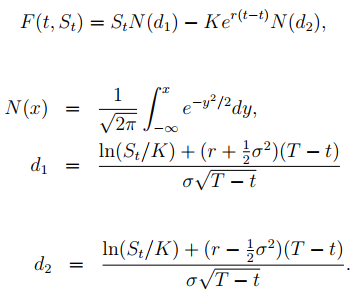
3. Opción de compra europea, suponiendo que los precios del activo son lognormales
4. Opción de venta europea, suponiendo que los precios del activo son lognormales

Entonces, ¿qué es la **volatilidad implícita**?

La volatilidad es una medida de la incertidumbre sobre el comportamiento futuro de un activo, que se mide habitualmente como la desviación típica de la rentabilidad de dicho activo. 

## Volatility smile 
-  Cuando las opciones con la misma fecha de vencimiento y el mismo activo subyacente, pero diferentes precios de ejercicio, se grafican por la volatilidad implícita, la tendencia es que ese gráfico muestre una sonrisa.
-  La sonrisa muestra que las opciones más alejadas 'in- or out-of-the-money' tienen la mayor volatilidad implícita.
- No todas las opciones tendrán una sonrisa de volatilidad implícita. Las opciones de acciones a corto plazo y las opciones relacionadas con la moneda tienen más probabilidades de tener una sonrisa de volatilidad

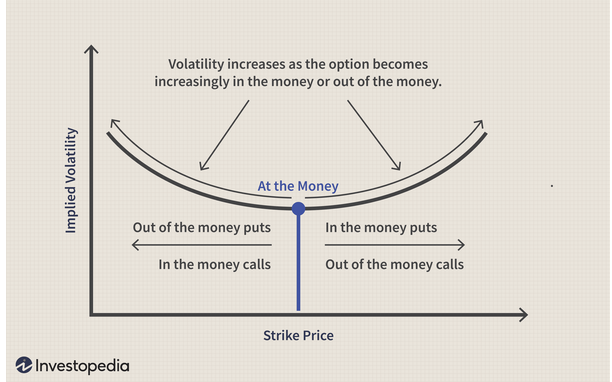

> Fuente: https://www.investopedia.com/terms/v/volatilitysmile.asp

> ### Validar para la `fecha = 2020-06-19` y para la fecha `fecha = '2021-01-15'`

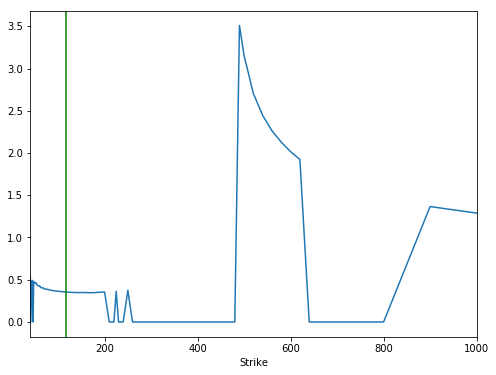

In [23]:
# para los call de la fecha 1
ax = call06_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(call06_f1.Underlying_Price.iloc[0], color='g');

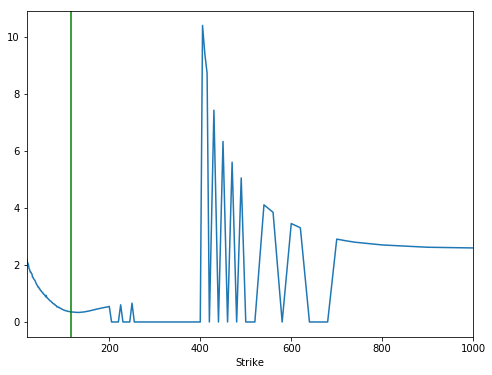

In [24]:
# para los call de la fecha 2
ax = call06_f2.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(call06_f2.Underlying_Price.iloc[0], color='g');

Analicemos ahora datos de los `put`

In [25]:
put06_f1 = aapl_opt.loc[(aapl_opt.Expiry==fecha1) & (aapl_opt.Type=='put')]
put06_f1

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
174,40.00,2022-09-16,put,...,2020-11-10 20:11:25,2020-11-09 15:09:21,"{'contractSymbol': 'AAPL220916P00040000', 'str..."
192,41.25,2022-09-16,put,...,2020-11-10 20:11:25,2020-11-09 18:15:34,"{'contractSymbol': 'AAPL220916P00041250', 'str..."
207,42.50,2022-09-16,put,...,2020-11-10 20:11:25,2020-11-06 19:12:07,"{'contractSymbol': 'AAPL220916P00042500', 'str..."
223,43.75,2022-09-16,put,...,2020-11-10 20:11:25,2020-11-09 17:34:30,"{'contractSymbol': 'AAPL220916P00043750', 'str..."
239,45.00,2022-09-16,put,...,2020-11-10 20:11:25,2020-11-04 18:24:40,"{'contractSymbol': 'AAPL220916P00045000', 'str..."
...,...,...,...,...,...,...,...
3332,700.00,2022-09-16,put,...,2020-11-10 20:11:25,2020-08-27 19:44:48,"{'contractSymbol': 'AAPL220916P00700000', 'str..."
3349,720.00,2022-09-16,put,...,2020-11-10 20:11:25,2020-08-25 19:59:35,"{'contractSymbol': 'AAPL220916P00720000', 'str..."
3363,740.00,2022-09-16,put,...,2020-11-10 20:11:25,2020-08-26 18:55:57,"{'contractSymbol': 'AAPL220916P00740000', 'str..."
3385,900.00,2022-09-16,put,...,2020-11-10 20:11:25,2020-08-27 18:51:13,"{'contractSymbol': 'AAPL220916P00900000', 'str..."


Para los `put` de la `fecha 1`

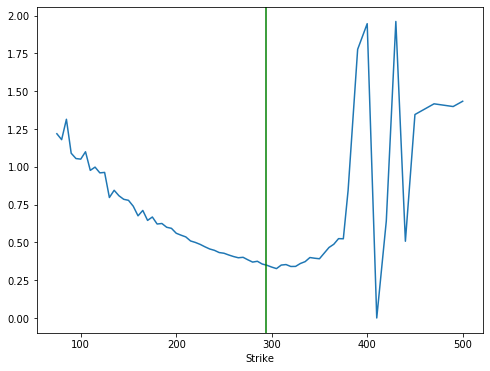

In [23]:
ax = put06_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f1.Underlying_Price.iloc[0], color='g')

Con lo que hemos aprendido, deberíamos ser capaces de crear una función que nos devuelva un `DataFrame` de `pandas` con los precios de cierre ajustados de ciertas compañías en ciertas fechas:
- Escribir la función a continuación

In [27]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

- Obtener como ejemplo los precios de cierre de Apple del año pasado hasta la fecha. Graficar...

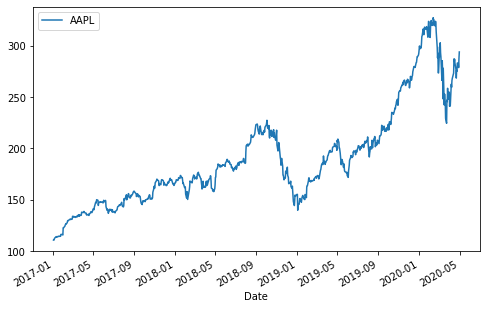

In [28]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

- Escribir una función que pasándole el histórico de precios devuelva los rendimientos logarítmicos:

In [32]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

- Graficar...

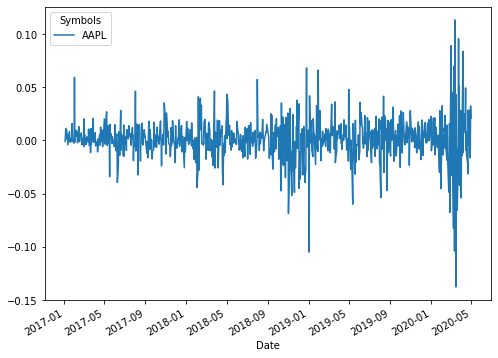

In [31]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

También, descargar datos de opciones de Apple:

In [33]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2020-05-01,217.5,put,AAPL200501P00217500,...,2020-04-30 20:00:02,2020-04-30 16:30:07,"{'contractSymbol': 'AAPL200501P00217500', 'str..."
2020-05-01,250.0,put,AAPL200501P00250000,...,2020-04-30 20:00:02,2020-04-30 19:59:55,"{'contractSymbol': 'AAPL200501P00250000', 'str..."
2020-05-01,250.0,call,AAPL200501C00250000,...,2020-04-30 20:00:02,2020-04-30 19:59:47,"{'contractSymbol': 'AAPL200501C00250000', 'str..."
2020-05-01,320.0,put,AAPL200501P00320000,...,2020-04-30 20:00:02,2020-04-30 18:50:33,"{'contractSymbol': 'AAPL200501P00320000', 'str..."
2020-05-01,125.0,call,AAPL200501C00125000,...,2020-04-30 20:00:02,2020-04-29 19:55:28,"{'contractSymbol': 'AAPL200501C00125000', 'str..."
...,...,...,...,...,...,...,...
2022-06-17,310.0,put,AAPL220617P00310000,...,2020-04-30 20:00:02,2020-04-28 15:20:44,"{'contractSymbol': 'AAPL220617P00310000', 'str..."
2022-06-17,180.0,put,AAPL220617P00180000,...,2020-04-30 20:00:02,2020-04-29 19:23:26,"{'contractSymbol': 'AAPL220617P00180000', 'str..."
2022-06-17,180.0,call,AAPL220617C00180000,...,2020-04-30 20:00:02,2020-04-29 19:10:59,"{'contractSymbol': 'AAPL220617C00180000', 'str..."


In [143]:
K = 290 # strike price
indice_opt = aapl_opt.loc[(aapl_opt.Type=='call') & (aapl_opt.Strike==K) & (aapl_opt.Expiry=='2021-01-15')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1147,290.0,2021-01-15,call,...,2020-04-30 20:00:02,2020-04-30 19:59:55,"{'contractSymbol': 'AAPL210115C00290000', 'str..."


In [35]:
i_opt= indice_opt.index
opcion_valuar = aapl_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115C00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 33.4,
 'change': 3.4000015,
 'percentChange': 11.333339,
 'volume': 440,
 'openInterest': 7855,
 'bid': 31.25,
 'ask': 35.0,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1588276795,
 'impliedVolatility': 0.33682914154052734,
 'inTheMoney': True}

In [36]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  293.8


# Simulación de precios usando rendimiento simple y logarítmico 

* Comenzaremos por suponer que los rendimientos son un p.e. estacionario que distribuyen $\mathcal{N}(\mu,\sigma)$.

## Rendimiento Simple

In [147]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-1.119e-03
2017-01-05,5.085e-03
2017-01-06,1.115e-02
2017-01-09,9.159e-03
2017-01-10,1.009e-03
...,...
2020-04-24,2.887e-02
2020-04-27,7.068e-04
2020-04-28,-1.621e-02


In [159]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

nscen = 10000
dates = pd.date_range(start = today, end = expiry, freq='B')
ndays = len(dates)
dates

DatetimeIndex(['2020-04-30', '2020-05-01', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-11',
               '2020-05-12', '2020-05-13',
               ...
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15'],
              dtype='datetime64[ns]', length=187, freq='B')

In [160]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,9997,9998,9999
2020-04-30,1.017e-02,3.090e-02,1.409e-02,...,3.902e-02,-3.526e-02,1.756e-02
2020-05-01,1.330e-04,-1.078e-03,-2.430e-04,...,6.429e-04,-5.771e-04,2.308e-04
2020-05-04,4.203e-06,-4.773e-05,-1.486e-06,...,-2.255e-06,-9.713e-06,8.413e-06
2020-05-05,1.171e-08,1.821e-07,5.205e-08,...,-3.446e-08,-1.843e-08,1.676e-08
2020-05-06,-6.516e-11,4.015e-10,6.124e-11,...,1.051e-09,3.058e-10,5.431e-10
...,...,...,...,...,...,...,...
2021-01-11,0.000e+00,0.000e+00,-0.000e+00,...,0.000e+00,-0.000e+00,0.000e+00
2021-01-12,0.000e+00,0.000e+00,-0.000e+00,...,-0.000e+00,0.000e+00,-0.000e+00
2021-01-13,0.000e+00,-0.000e+00,0.000e+00,...,-0.000e+00,0.000e+00,-0.000e+00
2021-01-14,-0.000e+00,-0.000e+00,0.000e+00,...,0.000e+00,-0.000e+00,0.000e+00


In [161]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento simple');

## Rendimiento Logarítmico

In [162]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

0.671789499286292

In [110]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.019208869670809783, 0.01924964812915329)

Con los precios simulados debemos de encontrar el valor de la opción según la función de pago correspondiente. Para este caso es:
$$
max(S_T - K,0)
$$

In [157]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115C00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 33.4,
 'change': 3.4000015,
 'percentChange': 11.333339,
 'volume': 440,
 'openInterest': 7855,
 'bid': 31.25,
 'ask': 35.0,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1588276795,
 'impliedVolatility': 0.33682914154052734,
 'inTheMoney': True}

In [ ]:
strike = pd.DataFrame(opcion_valuar['JSON']['strike']*np.ones([ndays,nscen]), index=dates)
call = pd.DataFrame({'Prima':np.exp(-mu_r*ndays) \
              *np.fmax(S_T2-strike,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
call.plot();
call.iloc[-1]

Prima    77.069
Name: 2021-01-15 00:00:00, dtype: float64

## 2. Valuación usando simulación: modelo normal para los rendimientos

- Hallar media y desviación estándar muestral de los rendimientos logarítmicos

In [134]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0011676498696159131, 0.01924964812915329)

No se toma la media sino la tasa libre de riesgo
> Referencia: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [132]:
# Tasa de bonos de 1 yr de fecha 30/04/20 -> 0.16%
r = 0.0016/360 # Tasa diaria

- Simularemos el tiempo de contrato desde `HOY` hasta la fecha de `Expiry`, 10 escenarios:
    
    - Generar fechas

In [131]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

ndays = (expiry - today).days
nscen = 10
dates = pd.date_range(start='2019-11-14', periods = ndays)
dates

DatetimeIndex(['2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
               '2019-11-22', '2019-11-23',
               ...
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30'],
              dtype='datetime64[ns]', length=260, freq='D')

- Generamos 10 escenarios de rendimientos simulados y guardamos en un dataframe

In [28]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2019-11-12,0.018,0.013,-0.014,...,0.043,0.022,0.003
2019-11-13,0.006,0.005,-0.038,...,0.034,-0.020,-0.009
2019-11-14,0.017,0.003,-0.040,...,0.034,-0.039,0.003
2019-11-15,-0.013,0.026,-0.023,...,0.045,-0.039,-0.019
2019-11-16,-0.019,0.023,-0.010,...,0.027,-0.039,-0.013
...,...,...,...,...,...,...,...
2020-02-24,-0.062,-0.127,-0.165,...,0.050,-0.135,0.023
2020-02-25,-0.064,-0.123,-0.153,...,0.054,-0.110,0.010
2020-02-26,-0.069,-0.117,-0.171,...,0.070,-0.090,-0.011
2020-02-27,-0.086,-0.117,-0.193,...,0.059,-0.092,-0.025


- Con los rendimientos simulados, calcular los escenarios de precios respectivos:

In [55]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,99997,99998,99999
2019-11-14,262.850,259.234,260.558,...,264.840,265.783,258.683
2019-11-15,267.078,260.961,261.625,...,263.834,263.963,260.232
2019-11-16,265.663,261.425,261.808,...,269.708,263.861,259.248
2019-11-17,274.593,263.144,259.387,...,268.595,264.321,261.338
2019-11-18,270.858,264.384,262.056,...,278.187,263.167,264.645
...,...,...,...,...,...,...,...
2020-02-26,225.503,249.221,264.476,...,261.389,376.696,348.646
2020-02-27,226.053,255.628,256.328,...,258.088,378.798,350.816
2020-02-28,222.790,257.654,255.705,...,256.333,386.645,346.941
2020-02-29,225.952,257.591,256.144,...,254.894,384.577,335.518


- Graficar:

In [30]:
# sim_closes.plot(figsize=(8,6));

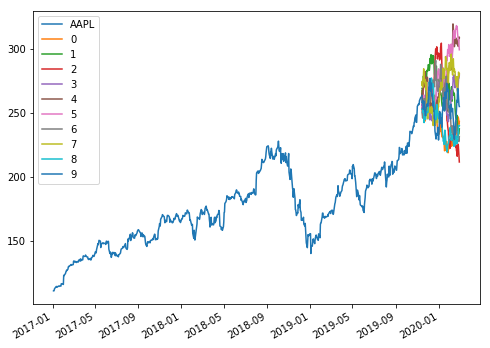

In [31]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [32]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115C00240000',
 'strike': 240.0,
 'currency': 'USD',
 'lastPrice': 42.47,
 'change': -1.0299988,
 'percentChange': -2.3678133,
 'volume': 40,
 'openInterest': 2663,
 'bid': 41.9,
 'ask': 42.65,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1573763308,
 'impliedVolatility': 0.27719839019775383,
 'inTheMoney': True}

In [75]:
sigma = 0.27719839019775383/np.sqrt(252)
sigma

0.01746185724501669

In [135]:
from datetime import date
Hoy = date.today()
K = opcion_valuar['JSON']['strike']  # strike price
ndays = (opcion_valuar.Expiry - today).days
nscen = 100000
dates = pd.date_range(start= Hoy, periods = ndays)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);

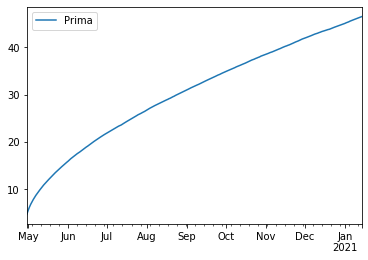

In [136]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
call.plot();


La valuación de la opción es:

In [137]:
call.iloc[-1]

Prima    46.522
Name: 2021-01-14 00:00:00, dtype: float64

Intervalo de confianza del 99%

In [138]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)


(45.7246314697357, 47.3199308196603)
(45.7246314697357, 47.3199308196603)


## Precios simulados usando técnicas de reducción de varianza

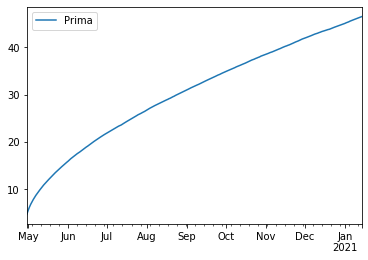

In [139]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes2-strike,np.zeros([ndays,nscen])).T.mean()}, index=dates)
call.plot();

La valuación de la opción es:

In [140]:
call.iloc[-1]

Prima    46.522
Name: 2021-01-14 00:00:00, dtype: float64

Intervalo de confianza del 99%

In [141]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)


(45.7246314697357, 47.3199308196603)
(45.7246314697357, 47.3199308196603)


### Análisis de la distribución de los rendimientos

### Ajustando norm

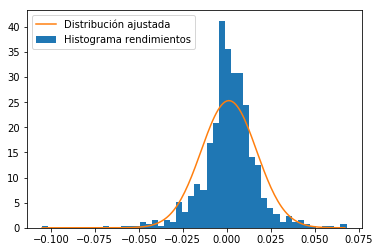

In [93]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()


### Ajustando t

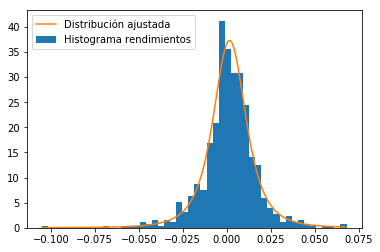

In [86]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

dof,mu_fit,sd_fit = st.t.fit(ren) # Se ajustan los parámetros de una t
# Valores máximo y mínimo de los rendiemientos a generar
# ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.t.pdf(ren_gen,df=dof,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

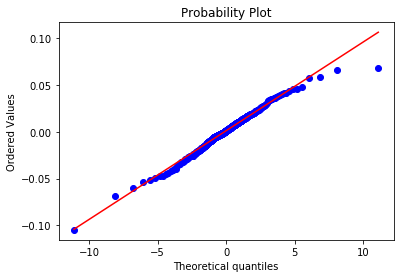

In [91]:
st.probplot(ren['AAPL'],sparams= dof, dist='t', plot=plt);

## 3. Valuación usando simulación: uso del histograma de rendimientos

Todo el análisis anterior se mantiene. Solo cambia la forma de generar los números aleatorios para la simulación montecarlo.

Ahora, generemos un histograma de los rendimientos diarios para generar valores aleatorios de los rendimientos simulados.

- Primero, cantidad de días y número de escenarios de simulación

In [92]:
ndays = 109 
nscen = 10

- Del histograma anterior, ya conocemos las probabilidades de ocurrencia, lo que se llamó como variable `y`

In [95]:
prob = y/np.sum(y)
values = x[1:]

- Con esto, generamos los números aleatorios correspondientes a los rendimientos (tantos como días por número de escenarios).

In [96]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2019-11-14,0.002,-0.001,0.016,...,-0.001,0.020,0.006
2019-11-15,-0.039,-0.001,0.006,...,-0.005,-0.008,0.002
2019-11-16,0.006,0.016,-0.018,...,0.002,-0.008,0.013
2019-11-17,-0.012,-0.001,-0.005,...,0.016,0.006,0.006
2019-11-18,-0.005,0.009,0.023,...,0.006,0.009,0.016
...,...,...,...,...,...,...,...
2020-02-26,0.020,0.006,0.006,...,-0.015,-0.018,0.002
2020-02-27,0.009,-0.025,0.006,...,-0.001,0.002,0.020
2020-02-28,0.006,-0.005,0.009,...,0.006,0.044,-0.008
2020-02-29,-0.025,-0.053,0.020,...,-0.005,0.006,0.006


In [97]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2019-11-14,263.250,262.341,266.919,...,262.341,267.844,264.163
2019-11-15,253.132,262.043,268.466,...,261.138,265.694,264.777
2019-11-16,254.600,266.312,263.562,...,261.745,263.562,268.161
2019-11-17,251.685,266.009,262.353,...,266.009,265.090,269.715
2019-11-18,250.530,268.478,268.478,...,267.551,267.551,274.109
...,...,...,...,...,...,...,...
2020-02-26,261.239,330.526,500.611,...,371.783,493.731,359.141
2020-02-27,263.664,322.251,503.513,...,371.360,494.879,366.256
2020-02-28,265.193,320.773,508.188,...,373.513,517.055,363.317
2020-02-29,258.554,304.205,518.256,...,371.799,520.052,365.423


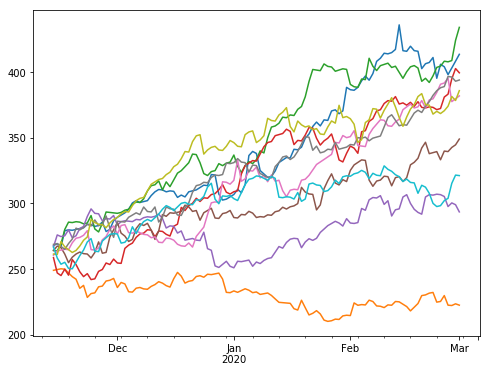

In [46]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5,1,'Simulación usando el histograma de los rendimientos')

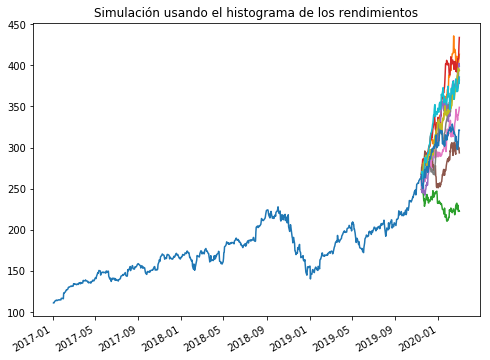

In [47]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [98]:
K=240
ndays = 109
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

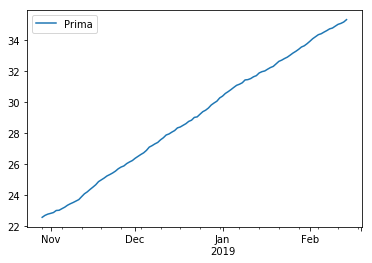

In [99]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
call_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
call_hist.plot();

In [100]:
call_hist.iloc[-1]

Prima    35.286
Name: 2019-02-14 00:00:00, dtype: float64

In [51]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115C00240000',
 'strike': 240.0,
 'currency': 'USD',
 'lastPrice': 42.47,
 'change': -1.0299988,
 'percentChange': -2.3678133,
 'volume': 40,
 'openInterest': 2663,
 'bid': 41.9,
 'ask': 42.65,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1573763308,
 'impliedVolatility': 0.27719839019775383,
 'inTheMoney': True}

Intervalo de confianza del 95%

In [101]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = call_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(34.419657128757756, 36.152767091478275)
(34.419657128757756, 36.152767091478275)


# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez and modify by Oscar Jaramillo Z.
</footer>